In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [20]:
DF=pd.read_csv(r'C:\Users\avira\Desktop\Random Inspirations\bodyfat.csv')
DF.describe()

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,18.601000,44.880000,177.451500,70.355000,37.894000,100.681000,91.867000,22.900000,32.292000,18.221000
std,8.006683,11.417937,29.508013,2.714807,2.302998,8.516493,10.261235,1.346451,3.065141,0.999322
min,3.700000,23.000000,127.500000,65.000000,32.800000,83.400000,70.400000,20.100000,25.600000,16.300000
25%,12.375000,39.750000,152.937500,68.250000,36.275000,94.000000,83.825000,22.000000,29.900000,17.600000
50%,18.950000,44.000000,176.125000,70.000000,37.900000,99.250000,90.150000,22.600000,32.000000,18.200000
75%,24.575000,52.000000,195.437500,72.250000,39.400000,105.600000,98.975000,23.725000,34.400000,18.825000
max,40.100000,74.000000,262.750000,77.750000,43.200000,128.300000,126.200000,27.000000,38.500000,21.400000


In [22]:
#train
#test
X=DF.iloc[:,1:]
Y=DF.iloc[:,0]

In [23]:
X

,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,41,247.25,73.50,42.1,117.0,115.6,26.3,37.3,19.7
1,31,177.25,71.50,36.2,101.1,92.4,24.6,30.1,18.2
2,42,156.25,69.00,35.5,97.8,86.0,24.0,31.2,17.4
3,23,154.25,67.75,36.2,93.1,85.2,21.9,32.0,17.1
4,46,177.00,70.00,37.2,99.7,95.6,22.5,29.1,17.7
...,...,...,...,...,...,...,...,...,...
95,48,177.25,72.75,36.8,96.0,90.0,22.8,29.9,18.1
96,43,187.75,74.00,37.7,97.8,98.6,23.8,34.3,17.7
97,33,184.25,68.75,40.7,98.9,92.1,23.5,33.5,19.7
98,26,223.00,70.25,40.6,114.1,106.8,24.7,36.0,18.4


In [24]:
Y

0     32.3
1     22.5
2     22.0
3     12.3
4     20.5
      ... 
95    20.1
96    29.4
97    13.0
98    25.2
99     4.0
Name: Bodyfat, Length: 100, dtype: float64

In [25]:
Xtrain, Xtest, Ytrain, Ytest=train_test_split(X,Y,test_size=0.2)

In [26]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(80, 9) (20, 9) (80,) (20,)


In [27]:
scx=StandardScaler()
scy=StandardScaler()
Xtrain=scx.fit_transform(Xtrain)
Ytrain=np.array(Ytrain).reshape(-1,1)
Ytrain=scy.fit_transform(Ytrain)

In [28]:
model=LinearRegression()
model.fit(Xtrain,Ytrain)

LinearRegression()

In [29]:
Xtest=scx.transform(Xtest)
Ypred=model.predict(Xtest)
Ypred=scy.inverse_transform(Ypred)

In [30]:
print(Ypred,Ytest)

[[ 3.96376037]
 [17.29995425]
 [ 9.07366661]
 [17.41856151]
 [22.40406177]
 [20.16271665]
 [29.13669572]
 [15.93899301]
 [24.99222821]
 [18.79757344]
 [13.73632712]
 [20.28523943]
 [14.66929607]
 [26.43133922]
 [16.62171136]
 [16.52655568]
 [23.94649024]
 [ 4.63536588]
 [20.04704535]
 [11.36235029]] 99     4.0
49    20.5
64     5.3
90    22.1
32    24.2
11    20.4
30    19.3
84    16.0
33    25.3
27    23.3
53     9.4
77    26.8
37    11.5
83    18.8
28     6.0
88    13.8
10    29.9
79     9.4
7     21.3
71     6.3
Name: Bodyfat, dtype: float64


In [31]:
DFAnalysis=pd.DataFrame(columns=['Ypred','Ytest'])

In [32]:
DFAnalysis['Ypred']=Ypred.reshape(-1)
DFAnalysis['Ytest']=np.array(Ytest)

In [23]:
DFAnalysis

,Ypred,Ytest
0,25.955512,28.7
1,25.331904,27.2
2,20.524011,27.2
3,17.517110,11.8
4,26.488431,25.8
5,22.717763,16.5
6,15.321201,13.8
7,18.590097,14.8
8,8.891318,10.3
9,15.576513,21.8


In [33]:
DFAnalysis['Error']=np.square(DFAnalysis['Ytest']-DFAnalysis['Ypred'])
#DFAnalysis['Error']=[(x-y)**2 for x,y in zip(DFAnalysis['Ytest'],DFAnalysis['Ypred'])]

In [30]:
DFAnalysis

,Ypred,Ytest,Error
0,25.955512,28.7,7.532213
1,25.331904,27.2,3.489781
2,20.524011,27.2,44.568833
3,17.517110,11.8,32.685345
4,26.488431,25.8,0.473937
5,22.717763,16.5,38.660571
6,15.321201,13.8,2.314052
7,18.590097,14.8,14.364832
8,8.891318,10.3,1.984386
9,15.576513,21.8,38.731785


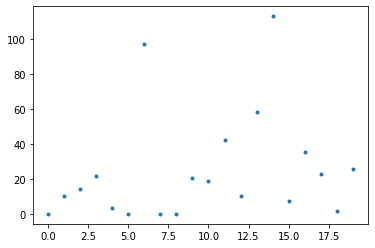

In [36]:
plt.plot(DFAnalysis['Error'],'.')
plt.show()


In [40]:
RMSE=np.sqrt(np.sum(DFAnalysis['Error']))
print(RMSE)
Mse=mean_squared_error(Ytest,Ypred)
print(Mse)
RMse=mean_squared_error(Ytest,Ypred,squared=False)
print(RMse)

22.403936647294074
25.096818864798323
5.009672530694828
